# 4.10 Task Part 1 (notebook 4)

## Table of Contents
### 4.10 Task Part 1 -- Question 5 continued (profiling variables)
### Remove 'income_range' and create simpler 'income_flag' with "abover average" and "below average"
### Bar chart of the number of orders for each hour of the day divided by income level

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path

path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 4\Instacart Basket Analysis'

In [3]:
# Importing data set

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Removing the limit to columns and rows displayed so I can see all the rows and columns going forward

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
# Checking imported data frame

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,income_range,age_range,department,prices_total
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,31.6
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,35.4
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,28.2
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,26.0
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,57.0


In [6]:
df.shape

(30964564, 37)

## 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

In [8]:
# First I want to change the current income flag to be simpler. I'm going to make it "above average" and "below average"

# Remove the current 'income_range' column

df.drop(columns=['income_range'], inplace=True)

In [9]:
# Checking column drop

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,age_range,department,prices_total
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,31.6
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,35.4
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,28.2
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,26.0
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,57.0


In [10]:
df.shape

(30964564, 36)

In [11]:
# Create a flag based on above and below average incomes

# Calculate mean income

df['income'].mean()

99675.86510754681

In [12]:
df.loc[df ['income'] <= 99676, 'income_flag'] = 'below average'

In [13]:
df.loc[df ['income'] > 99676, 'income_flag'] = 'above average'

In [14]:
df['income_flag'].value_counts(dropna = False)

income_flag
below average    16624881
above average    14339683
Name: count, dtype: int64

In [15]:
# New column checks

16624881+14339683

30964564

In [16]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,age_range,department,prices_total,income_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,31.6,below average
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,35.4,below average
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,28.2,below average
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,26.0,below average
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,57.0,below average


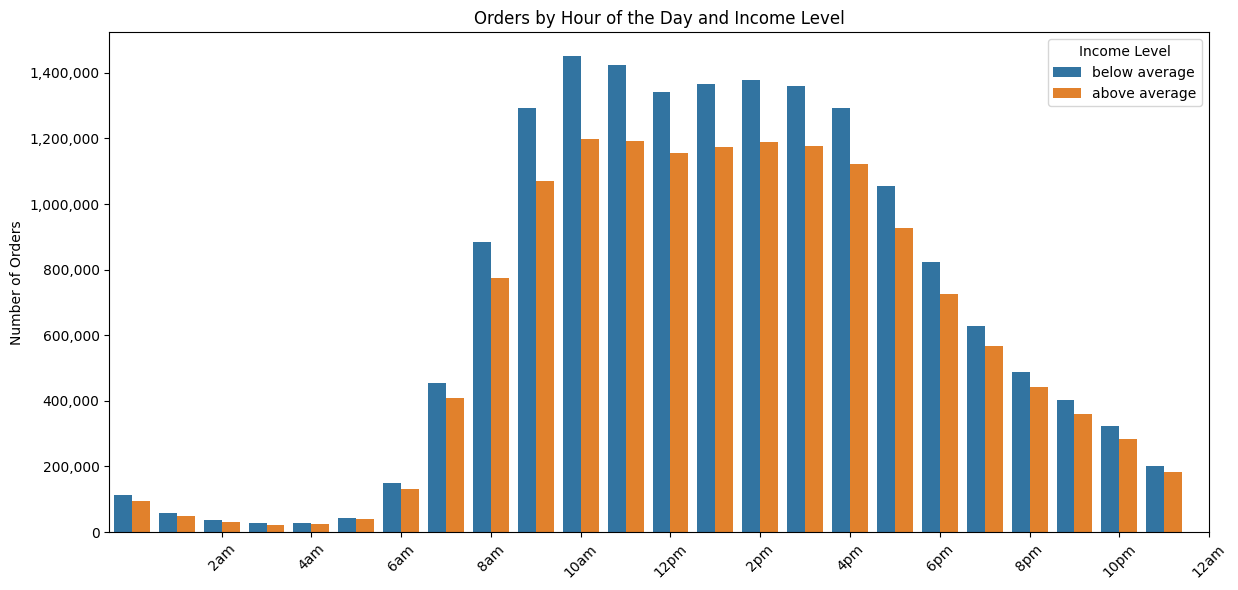

In [17]:
# Create a bar chart of the number of orders for each hour of the day divided by income level

from matplotlib.ticker import ScalarFormatter, FuncFormatter

plt.figure(figsize=(12, 6))
sns.countplot(x='order_hour_of_day', hue='income_flag', data=df)

# Adding labels and title
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour of the Day and Income Level')

# Display the legend
plt.legend(title='Income Level', loc='upper right')

# Customize the x-axis ticks and labels
custom_xticks = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
custom_xlabels = ['2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm', '12am']

plt.xticks(custom_xticks, custom_xlabels, rotation=45)  # Rotate x-axis labels for readability

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Format y-axis tick labels to display full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hours_by_income.png'), bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

In [19]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'order_products_all.pkl'))